<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [66]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [67]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [68]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [69]:
boston_df=pd.read_csv(boston_url)
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### MEDV Boxplot


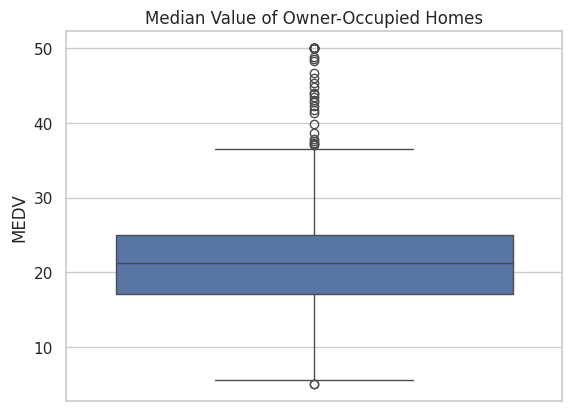

In [58]:
## boxplot for the median value of owner-ocupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median Value of Owner-Occupied Homes')
pyplot.show()

#### Results


This boxplot shows that the Median value of Owner-Occupied Homes is at more than 20,000 dollars and less than 25,000 dollars. This puts the overall median value around 21,000 or 22,000. The minimum value is around 5k, while the maximum value is at 50k. The dots appearing outside of the box are outliers.

### CHAS Barplot


<AxesSubplot:xlabel='Are the houses bound by the River', ylabel='Count'>

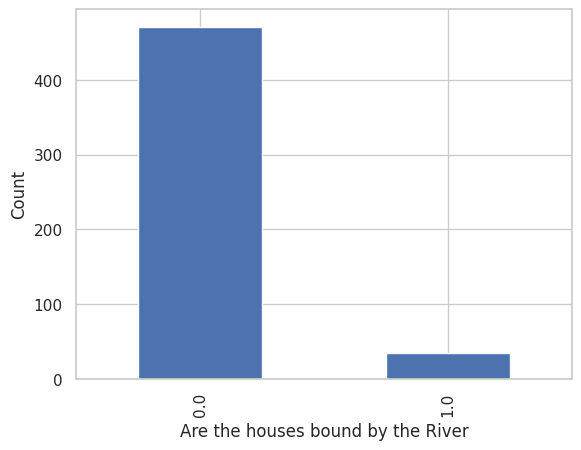

In [166]:
boston_df['CHAS'].value_counts().plot(kind='bar',xlabel='Are the houses bound by the River', ylabel='Count')

#### Results


From this chart, we can see how much the Charles River variable effects

### AGE and MEDV Boxplot


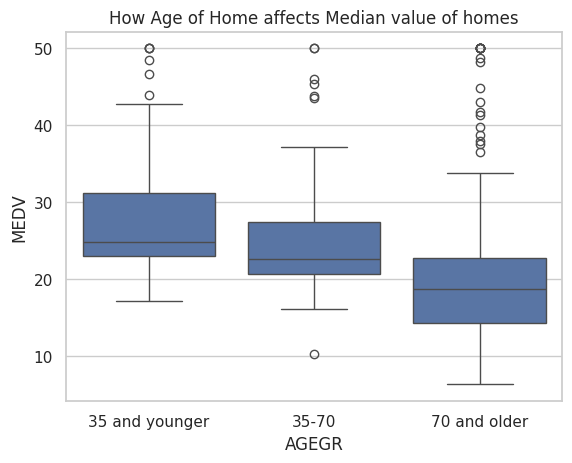

In [103]:
bins = [0, 35, 70, 100]
labels = ['35 and younger', '35-70', '70 and older'] 
boston_df['AGEGR'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
ax = sns.boxplot(x='AGEGR', y='MEDV', data=boston_df)
pyplot.title('How Age of Home affects Median value of homes')
pyplot.show()

#### Results


This boxplot shows us how the age of a home affects the median value of the home. We can see that homes aged 35 years or younger have a higher median value than homes aged 70 and older, while homes aged between 35 and 70 are in the middle, as to be expected. However, there are outlier homes within the 70 and older category, showing that these homes can still have a median value as high as younger homes. 

### NOX and INDUS Scatterplot


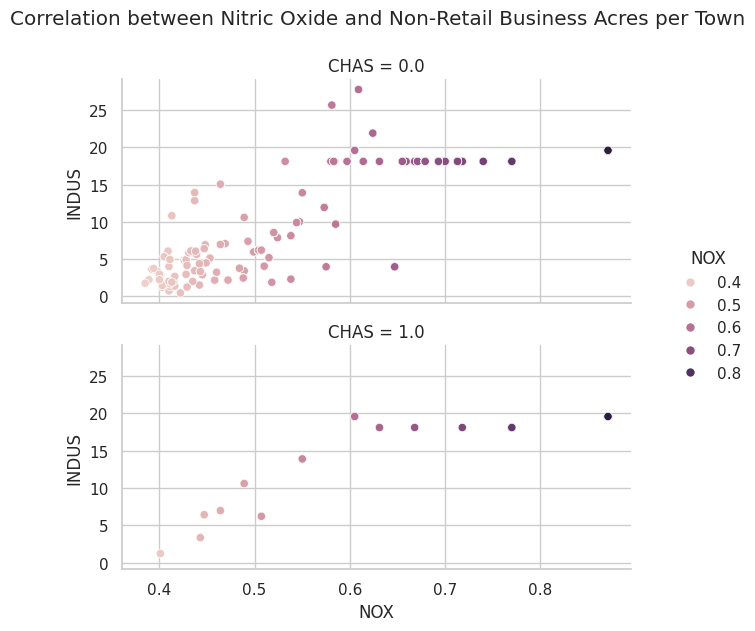

In [61]:
sns.relplot(x="NOX", y="INDUS", hue="NOX",
            row="CHAS",
            data=boston_df, height = 3, aspect = 2)
pyplot.suptitle('Correlation between Nitric Oxide and Non-Retail Business Acres per Town', y=1.05)
pyplot.show()

#### Results


From this scatterplot, we can see that there is a correlation between higher Nitric Oxide concentration and more non-retail business acres. However, this data mostly reaches a plateau at around 0.06 Nitric Oxide parts per 10 million. This shows that a higher number, like 0.8, has about the same number of acres as a 0.6.

### PTRATIO Histogram


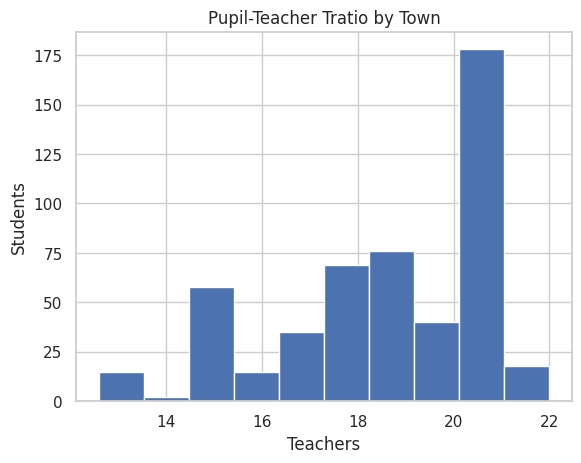

In [102]:
ptratio_data = boston_df['PTRATIO']

pyplot.hist(ptratio_data, bins=10, edgecolor='white')
pyplot.title('Pupil-Teacher Tratio by Town')
pyplot.xlabel('Teachers')
pyplot.ylabel('Students')
pyplot.show()

#### Results


This histogram shows us the pupil to teacher ratio by town. This chart does not have a normal distribution, as there is not a smooth curve. Rather, we see that more frequently, towns with more teachers do tend to have more students. However, this does not seem proportionate because the jump from students between towns with 18 teachers to towns with 20 teachers is extreme.

### Tests


#### T-Test


Hypothesis: There is a significant difference in the median value of homes bounded by the Charles river.

Alternative Hypothesis: There is no significant difference in the values of these homes.

In [107]:
chas_data = boston_df['CHAS']
medv_data = boston_df['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(medv_chas_0, medv_chas_1)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


From the results of this test, we can see that there is a significant difference in the value of these homes. The p-value is over the alpha value of 5%. Therefore we can fail to reject the null hypothesis.

#### ANOVA


Hypothesis: There is a significant difference in the median value of homes for each proportion of owner occupied units built prior to 1940.

Alternative Hypothesis: There is not a significant difference in the median value of homes for each proportion of owner occupied units built prior to 1940.

In [164]:
from scipy.stats import f_oneway
#turning age of home into year home was built
current_year = 2024
boston_df['Year_Built'] = current_year - boston_df['AGE']

boston_df['AGE_cat'] = boston_df['Year_Built'].apply(lambda x: 'before 1940' if x < 1940 else 'after 1940')
print(boston_df['AGE_cat'].value_counts())

medv_before_1940 = boston_df[boston_df['AGE_cat'] == 'before 1940']['MEDV']
medv_after_1940 = boston_df[boston_df['AGE_cat'] == 'after 1940']['MEDV']

# Perform the ANOVA test
f_stat, p_value = f_oneway(medv_before_1940, medv_after_1940)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

after 1940     289
before 1940    217
Name: AGE_cat, dtype: int64
F-statistic: 70.89786758512082
P-value: 3.9330184294042697e-16


This test required us to change the AGE information given to us. This was originally put in as how many years is has been since the home was built. We had to change that to what specific year the home was built, so that we could tell whether it was built after or before 1940. The p-value we get from running this test is over 0.05%, so the results are significant. This means that we can fail to reject our hypothesis. There is a significant difference in the median value of homes for each proportion of owner occupied uinits built prior to 1940.

#### Pearson Correlation


Hypothesis: There is not a significant relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

Alternative Hypothesis: There is a significant relationship between Nitric Oxide concentration an dproportion of non-retail business acres per town.

In [140]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Results: We can see, since the p-value is greater than 0.05, that there is a significant relationship between the concentration of nitric oxide and the proportion of non-retail business acres per town. This means that we reject our hypothesis.

#### Regression Analysis


Hypothesis: There is a significant impact of an additional weighted distance to the 5 Boston employment centers on the median value of owner occupied homes.

Alternative Hypothesis: There is not a significant impact of an additional weighted distance to the 5 Boston employment centers on the median value of owner occupied homes.

In [142]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        15:16:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the p-value for const (intercept) is 0.000 and the p-value for DIS (weighted distances to 5 Boston employment centers) is also 0.000. This means that the DIS does not significantly affect the MEDV, so we would reject our null hypothesis,